# x[:,0]  first bracket bhitra gayara all and 0 index ko sabai value nikalxa
#x[:,1] first bracker bhitra gayara all and 1 index ko sabai nikalxa 
# x[:,:,0] first bracket bhitra janxa ,ajhai second bracket bhitra janxa and tesko index 0 ko sabai value nikalxa

# **auta row input(x) ko lagi auta row label(y) **
# **array ko ni yasari nai concept banauni.** 

In [64]:
pip install numpy

In [65]:
pip install matplotlib

In [66]:
pip install sklearn

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 

In [93]:
x,y=sklearn.datasets.make_moons(200,noise=0.15)
print(x.shape)
print(y.shape)


(200, 2)
(200,)


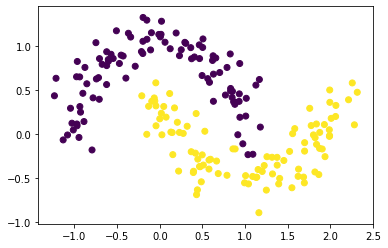

In [95]:
plt.scatter(x[:,0],x[:,1],c=y)

In [70]:
print(x.shape,y.shape)

(200, 2) (200,)


In [0]:
input_nurons=2
output_neurons=2
samples=x.shape[0]
learning_rate=0.001

In [0]:
def retreive (model_dict):  # retrive vanni function le mode_dict-dictionary ko data retrive garxa
  w1=model_dict['w1']
  b1=model_dict['b1']
  w2=model_dict['w2']
  b2=model_dict['b2']
  return w1,b1,w2,b2

In [0]:
def forward(x,model_dict):
  w1,b1,w2,b2=retreive(model_dict)
  z1=np.matmul(x,w1)+b1
  a1=np.tanh(z1)
  z2=np.matmul(a1,w2)+b2
  exp_scores=np.exp(z2)
  softmax=exp_scores/np.sum(exp_scores,axis=1,keepdims=True) # softmax vaneko predicted value dennxa
  return z1,a1,softmax

In [0]:
def loss (softmax,y,model_dict):
    w1,b1,w2,b2=retreive(model_dict)
    m=np.zeros(200)
    for i ,correct_index in enumerate(y):
      predicted=softmax[i][correct_index]
      m[i]=predicted
    log_probs=-np.log(m)
    loss=np.sum(log_probs)/y.shape[0]
    return float(loss)




In [0]:
def backpropagation(x,y,model_dict,epochs):
  for i in range(epochs):
        w1,b1,w2,b2=retreive(model_dict)
        z1,a1,probs=forward(x,model_dict)
        delta3=np.copy(probs)
        delta3[range(x.shape[0]),y]-=1 # (200,1)
        dw2=np.matmul((a1.T),delta3) #(3,2)
        db2=np.sum(delta3,axis=0,keepdims=True) #(1,2)
        delta2=np.matmul(delta3,w2.T)*(1-np.power(np.tanh(z1),2))
        dw1=np.matmul(x.T,delta2)
        db1=np.sum(delta2,axis=0)
        # update weight and bias 
        w1+=-learning_rate*dw1
        w2+=-learning_rate*dw2
        b1+=-learning_rate*db1
        b2+=-learning_rate*db2
        model_dict={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
        if i%50==0:
          print("loss at epoch{} id {:.3f}".format(i,loss(probs,y,model_dict)))
        return model_dict 





In [0]:
def init_network(input_dim,hidden_dim,output_dim): # parameter initialization
  model={}
  w1=np.random.randn(input_dim,hidden_dim)
  w2=np.random.randn(hidden_dim,output_dim)
  b1=np.zeros((1,hidden_dim))
  b2=np.zeros((1,output_dim))
  model["w1"]=w1
  model["b1"]=b1
  model["w2"]=w2
  model["b2"]=b2
  return model




In [0]:
model_dict=init_network(input_dim=input_nurons,hidden_dim=3,output_dim=output_neurons)

In [83]:
model_dict

{'b1': array([[0., 0., 0.]]),
 'b2': array([[0., 0.]]),
 'w1': array([[ 0.31240277,  0.77242943,  1.00309419],
        [ 0.365842  , -0.02924839,  0.29312357]]),
 'w2': array([[-0.23634698,  0.51895667],
        [ 0.1580319 ,  0.37985631],
        [-0.30360461, -0.61688387]])}

In [85]:
model=backpropagation(x,y,model_dict,epochs=10000)

loss at epoch0 id 0.676
